# **МОРСКИЕ_УШКИ**

**(ЧИСТИМ ОТ ВЫБРОСОВ)**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных')

In [ ]:
filename='abalone.data'
names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df=read_csv(filename,names=names)
df["year"] = df["Rings"]*1.5
df.sample(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,year
4101,F,0.675,0.51,0.15,1.1965,0.475,0.304,0.386,11,16.5
3700,F,0.660,0.53,0.17,1.4310,0.622,0.309,0.398,10,15.0


In [ ]:
df["Sex"] = df["Sex"].astype('category').cat.codes # преобразуем 'object' в числовой столбец

In [ ]:
# заменяем пробельные символы на подчеркивания
df=df.rename(columns=lambda x: x.replace(' ','_'))

In [ ]:
df.sample(2)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,year
528,0,0.57,0.45,0.16,0.9715,0.3965,0.255,0.26,12,18.0
304,0,0.47,0.36,0.13,0.4720,0.1820,0.114,0.15,10,15.0


# **ПОЕХАЛИ. ПЕРВИЧНЫЙ АНАЛИЗ. 1**

In [ ]:
df.shape

(4177, 10)

In [ ]:
df.dtypes

Sex                  int8
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
year              float64
dtype: object

In [ ]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
year              0
dtype: int64

In [ ]:
pd.set_option('precision', 3)

In [ ]:
df.sample(4)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,year
1022,0,0.640,0.500,0.170,1.518,0.693,0.326,0.409,11,16.5
469,2,0.675,0.555,0.200,1.438,0.545,0.267,0.465,21,31.5
969,2,0.510,0.410,0.145,0.796,0.387,0.181,0.196,8,12.0
2866,1,0.320,0.205,0.080,0.181,0.088,0.034,0.050,5,7.5


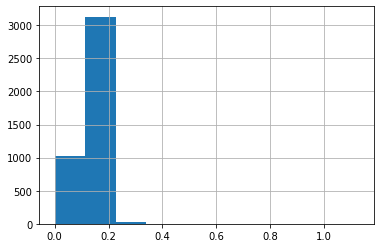

In [ ]:
df.Height.hist()
plt.show()

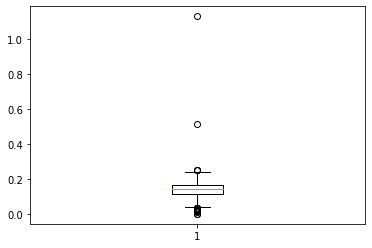

In [ ]:
plt.boxplot(df.Height) # здесь видим выбросы, надо как-то избавиться
plt.show()

In [ ]:
df.Height.std()

0.04182705660725703

In [ ]:
df.Height.mean()

0.1395163993296614

In [ ]:
df.Height.median()

0.14

**2 варианта пределов за которыми располагаются выбросы:**

1. ищем тройной межквартильный интервал

In [ ]:
iqr = df.Height.quantile(0.75) - df.Height.quantile(0.25)
iqr # интерквартильный интервал (разность квантилей)

0.05

In [ ]:
lim_min = df.Height.quantile(0.25)-iqr # нижний предел
lim_min

0.065

In [ ]:
lim_max = df.Height.quantile(0.75)-iqr # верхний предел
lim_max

0.115

вывод: т.е. чистые данные располагаются в пределах **[0.065:0.115]**

2. ищем диапазон между верхним и нижним std умноженным на 1.5

In [ ]:
df.Height.std()

0.04182705660725703

In [ ]:
df.Height.mean()

0.1395163993296614

In [ ]:
a = df.Height.mean() - df.Height.std()*2.4
a

0.039131463472244526

In [ ]:
b = df.Height.mean() + df.Height.std()*2.4
b

0.23990133518707826

вывод: т.е. чистые данные располагаются в пределах **[0.077:0.203]**, т.е. диапазон тройного МКИ меньше

In [ ]:
df.Height = df[(df.Height > a) & (df.Height < b)].Height

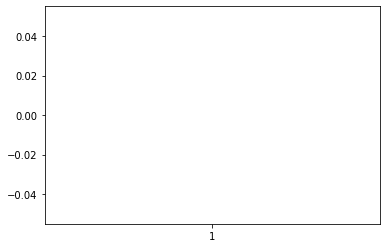

In [ ]:
plt.boxplot(df.Height) # здесь видим выбросы, надо как-то избавиться
plt.show()

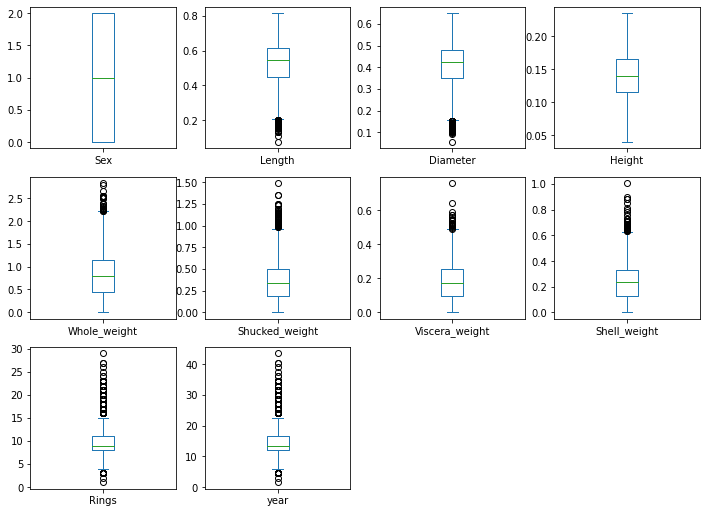

In [ ]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(12,12))
plt.show()

In [ ]:
df.isna().sum()

Sex                0
Length             0
Diameter           0
Height            33
Whole_weight       0
Shucked_weight     0
Viscera_weight     0
Shell_weight       0
Rings              0
year               0
dtype: int64

In [ ]:
df.shape

(4177, 10)

In [ ]:
df.dropna()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,year
0,2,0.455,0.365,0.095,0.514,0.225,0.101,0.150,15,22.5
1,2,0.350,0.265,0.090,0.226,0.100,0.049,0.070,7,10.5
2,0,0.530,0.420,0.135,0.677,0.257,0.141,0.210,9,13.5
3,2,0.440,0.365,0.125,0.516,0.215,0.114,0.155,10,15.0
4,1,0.330,0.255,0.080,0.205,0.089,0.040,0.055,7,10.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.887,0.370,0.239,0.249,11,16.5
4173,2,0.590,0.440,0.135,0.966,0.439,0.214,0.261,10,15.0
4174,2,0.600,0.475,0.205,1.176,0.525,0.287,0.308,9,13.5
4175,0,0.625,0.485,0.150,1.095,0.531,0.261,0.296,10,15.0


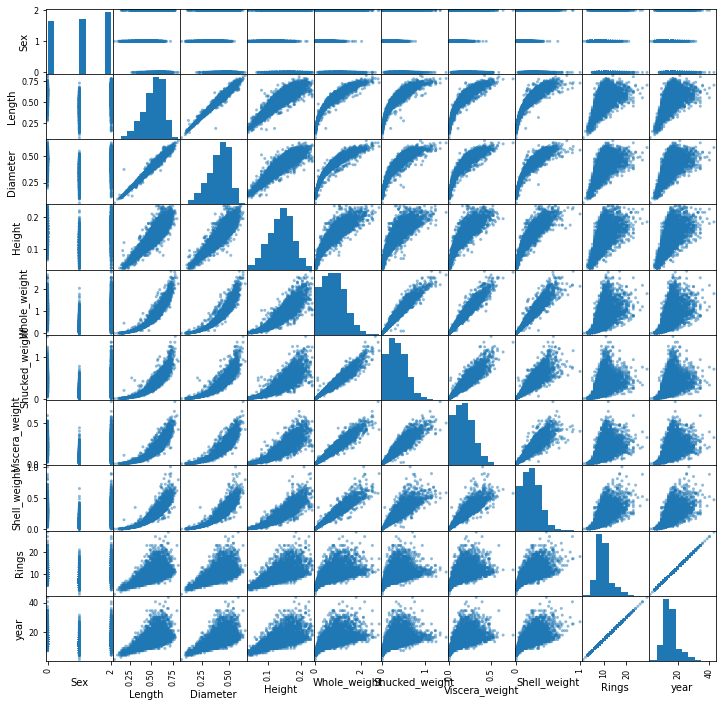

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(12,12))
plt.show()





In [ ]:
df.corr(method='pearson')

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,year
Sex,1.000,-0.036,-0.039,-0.044,-0.021,-0.001,-0.032,-0.035,-0.035,-0.035
Length,-0.036,1.000,0.987,0.899,0.925,0.898,0.903,0.898,0.557,0.557
Diameter,-0.039,0.987,1.000,0.906,0.925,0.893,0.900,0.905,0.575,0.575
Height,-0.044,0.899,0.906,1.000,0.891,0.840,0.870,0.894,0.600,0.600
Whole_weight,-0.021,0.925,0.925,0.891,1.000,0.969,0.966,0.955,0.540,0.540
Shucked_weight,-0.001,0.898,0.893,0.840,0.969,1.000,0.932,0.883,0.421,0.421
Viscera_weight,-0.032,0.903,0.900,0.870,0.966,0.932,1.000,0.908,0.504,0.504
Shell_weight,-0.035,0.898,0.905,0.894,0.955,0.883,0.908,1.000,0.628,0.628
Rings,-0.035,0.557,0.575,0.600,0.540,0.421,0.504,0.628,1.000,1.000
year,-0.035,0.557,0.575,0.600,0.540,0.421,0.504,0.628,1.000,1.000


In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df.skew()

Sex              -0.098
Length           -0.640
Diameter         -0.609
Height           -0.198
Whole_weight      0.531
Shucked_weight    0.719
Viscera_weight    0.592
Shell_weight      0.621
Rings             1.114
year              1.114
dtype: float64

In [ ]:
df.kurtosis()

Sex              -1.514
Length            0.065
Diameter         -0.045
Height           -0.388
Whole_weight     -0.024
Shucked_weight    0.595
Viscera_weight    0.084
Shell_weight      0.532
Rings             2.331
year              2.331
dtype: float64

In [ ]:
df.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,year
count,4177.000,4177.000,4177.000,4144.000,4177.000,4177.000,4.177e+03,4177.000,4177.000,4177.000
mean,1.053,0.524,0.408,0.140,0.829,0.359,1.806e-01,0.239,9.934,14.901
std,0.822,0.120,0.099,0.037,0.490,0.222,1.096e-01,0.139,3.224,4.836
min,0.000,0.075,0.055,0.040,0.002,0.001,5.000e-04,0.002,1.000,1.500
25%,0.000,0.450,0.350,0.115,0.442,0.186,9.350e-02,0.130,8.000,12.000
50%,1.000,0.545,0.425,0.140,0.799,0.336,1.710e-01,0.234,9.000,13.500
75%,2.000,0.615,0.480,0.165,1.153,0.502,2.530e-01,0.329,11.000,16.500
max,2.000,0.815,0.650,0.235,2.825,1.488,7.600e-01,1.005,29.000,43.500


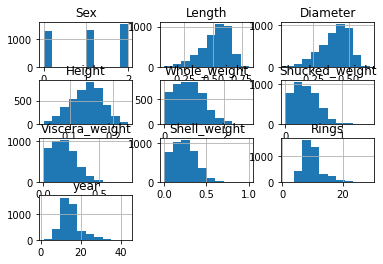

In [ ]:
df.hist()
plt.show()

In [ ]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,year
0,2,0.455,0.365,0.095,0.514,0.225,0.101,0.150,15,22.5
1,2,0.350,0.265,0.090,0.226,0.100,0.049,0.070,7,10.5
2,0,0.530,0.420,0.135,0.677,0.257,0.141,0.210,9,13.5
3,2,0.440,0.365,0.125,0.516,0.215,0.114,0.155,10,15.0
4,1,0.330,0.255,0.080,0.205,0.089,0.040,0.055,7,10.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.887,0.370,0.239,0.249,11,16.5
4173,2,0.590,0.440,0.135,0.966,0.439,0.214,0.261,10,15.0
4174,2,0.600,0.475,0.205,1.176,0.525,0.287,0.308,9,13.5
4175,0,0.625,0.485,0.150,1.095,0.531,0.261,0.296,10,15.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
res=stats.shapiro(np.log10(df['Whole_weight']))
print('p-value:',res[1])

p-value: 0.0


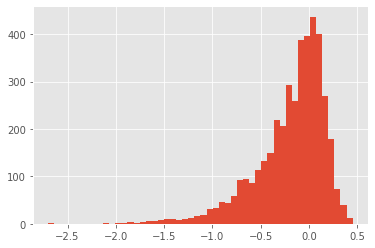

In [ ]:
plt.hist(np.log10(df['Whole_weight']), bins=50)
plt.show()